In [57]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import pandas as pd
import pandas
import numpy as np
import scipy
import scipy.stats as st
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
from datetime import datetime

In [5]:
Data_2017 = pd.read_excel("PERM_Disclosure_Data_FY17.xlsx")
Data_2015 = pd.read_excel("PERM_Disclosure_Data_FY15_Q4.xlsx")
Data_2016 = pd.read_excel("PERM_Data_FY16.xlsx")

In [6]:
Data_2015.at[8809, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('10/22/2014', '%m/%d/%Y')
Data_2015.at[29257, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('10/06/2014', '%m/%d/%Y')
Data_2015.at[86322, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('03/09/2015', '%m/%d/%Y')
Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'] = pandas.to_datetime(Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'])
Data_2015['RECR_INFO_SWA_JOB_ORDER_START'] = pandas.to_datetime(Data_2015['RECR_INFO_SWA_JOB_ORDER_START'])
Data_2015.at[6306, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/26/2014', '%m/%d/%Y')
Data_2015.at[8602, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('11/08/2014', '%m/%d/%Y')
Data_2015.at[12210, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/25/2014', '%m/%d/%Y')
Data_2015.at[35208, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('08/30/2013', '%m/%d/%Y')
Data_2015.at[41211, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/25/2014', '%m/%d/%Y')
Data_2015.at[79773, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/19/2014', '%m/%d/%Y')
Data_2015.at[80176, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('06/14/2015', '%m/%d/%Y')
Data_2015.at[80177, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('06/14/2015', '%m/%d/%Y')
Data_2015.at[83651, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/26/2013', '%m/%d/%Y')
Data_2015['RECR_INFO_SWA_JOB_ORDER_END'] = pandas.to_datetime(Data_2015['RECR_INFO_SWA_JOB_ORDER_END'])
Data_2015.at[76114, 'RI_EMPLOYER_WEB_POST_FROM'] = datetime.strptime('04/22/2014', '%m/%d/%Y')
Data_2015.at[89154, 'RI_EMPLOYER_WEB_POST_FROM'] = datetime.strptime('05/01/2015', '%m/%d/%Y')
Data_2015['RI_EMPLOYER_WEB_POST_FROM'] = pandas.to_datetime(Data_2015['RI_EMPLOYER_WEB_POST_FROM'])
Data_2015.at[29489, 'RECR_INFO_PRO_ORG_ADVERT_FROM'] = datetime.strptime('01/01/2013', '%m/%d/%Y')
Data_2015['RECR_INFO_PRO_ORG_ADVERT_FROM'] = pandas.to_datetime(Data_2015['RECR_INFO_PRO_ORG_ADVERT_FROM'])
Data_2015.at[26192, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('01/13/2014', '%m/%d/%Y')
Data_2015.at[70342, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('05/02/2014', '%m/%d/%Y')
Data_2015.at[83733, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('11/15/2011', '%m/%d/%Y')
Data_2015['RI_JOB_SEARCH_WEBSITE_FROM'] = pandas.to_datetime(Data_2015['RI_JOB_SEARCH_WEBSITE_FROM'])
Data_2015.at[24138, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('12/23/2014', '%m/%d/%Y')
Data_2015.at[38262, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('06/04/2014', '%m/%d/%Y')
Data_2015.at[47808, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('06/25/2014', '%m/%d/%Y')
Data_2015['RI_EMPLOYEE_REFERRAL_PROG_FROM'] = pandas.to_datetime(Data_2015['RI_EMPLOYEE_REFERRAL_PROG_FROM'])
Data_2015.at[14771, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('04/01/2013', '%m/%d/%Y')
Data_2015.at[49525, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('05/02/2013', '%m/%d/%Y')
Data_2015.at[73061, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('09/23/2014', '%m/%d/%Y')
Data_2015['RI_CAMPUS_PLACEMENT_FROM'] = pandas.to_datetime(Data_2015['RI_CAMPUS_PLACEMENT_FROM'])
Data_2017.at[31198, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2017.at[77798, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('04/26/2017', '%m/%d/%Y')
Data_2017.at[92988, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2017', '%m/%d/%Y')

Data_2017['RECR_INFO_SWA_JOB_ORDER_START'] = pandas.to_datetime(Data_2017['RECR_INFO_SWA_JOB_ORDER_START'])
#Data_2017.at[31198, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
#Data_2017.at[77798, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('04/26/2017', '%m/%d/%Y')
Data_2017.at[704, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/17/2016', '%m/%d/%Y')
Data_2017.at[2932, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('04/13/2016', '%m/%d/%Y')
Data_2017.at[18749, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/13/2016', '%m/%d/%Y')
Data_2017.at[73589, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/05/2017', '%m/%d/%Y')
Data_2017.at[82743, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/06/2017', '%m/%d/%Y')
Data_2017.at[92390, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/27/2017', '%m/%d/%Y')
Data_2017.at[93721, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/27/2017', '%m/%d/%Y')
Data_2017.at[96292, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/05/2017', '%m/%d/%Y')
Data_2017['RECR_INFO_SWA_JOB_ORDER_END'] = pandas.to_datetime(Data_2017['RECR_INFO_SWA_JOB_ORDER_END'])
Data_2016.at[96389, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2016['RECR_INFO_SWA_JOB_ORDER_START'] = pandas.to_datetime(Data_2016['RECR_INFO_SWA_JOB_ORDER_START'])
Data_2016.at[29552, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('06/04/2015', '%m/%d/%Y')
Data_2016.at[33362, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/06/2015', '%m/%d/%Y')
Data_2016.at[49878, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/02/2015', '%m/%d/%Y')
Data_2016.at[60593, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('08/03/2015', '%m/%d/%Y')
Data_2016.at[91218, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('11/30/2015', '%m/%d/%Y')
Data_2016.at[113096, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/15/2016', '%m/%d/%Y')
Data_2016.at[114287, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2016.at[120997, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2016['RECR_INFO_SWA_JOB_ORDER_END'] = pandas.to_datetime(Data_2016['RECR_INFO_SWA_JOB_ORDER_END'])

In [7]:
frames = [Data_2015, Data_2016, Data_2017]

data = pd.concat(frames)
data = data.drop_duplicates()
data_raw = data.copy()

## Transforming the columns

In [8]:
#For wages that have a to and from, Im just gonna take the average
data_wage = data[['WAGE_OFFER_UNIT_OF_PAY_9089','WAGE_OFFER_FROM_9089','WAGE_OFFER_TO_9089','CASE_STATUS']]
#cleaning up the wages of the offer
#pd.to_numeric(data_wage['WAGE_OFFER_FROM_9089'])
data['WAGE_OFFER_FROM_9089'] = data['WAGE_OFFER_FROM_9089'].apply(lambda word: str(word).replace("#", ""))
data['WAGE_OFFER_FROM_9089'] = data['WAGE_OFFER_FROM_9089'].apply(lambda word: str(word).replace(",", ""))
data['WAGE_OFFER_FROM_9089'] = data['WAGE_OFFER_FROM_9089'].replace({"nan": np.NaN})
data['WAGE_OFFER_FROM_9089'] = pd.to_numeric(data['WAGE_OFFER_FROM_9089'])
data['WAGE_OFFER_TO_9089'] = data['WAGE_OFFER_TO_9089'].apply(lambda word: str(word).replace("#", ""))
data['WAGE_OFFER_TO_9089'] = data['WAGE_OFFER_TO_9089'].apply(lambda word: str(word).replace(",", ""))
data['WAGE_OFFER_TO_9089'] = data['WAGE_OFFER_TO_9089'].replace({"nan": np.NaN})
data['WAGE_OFFER_TO_9089'] = pd.to_numeric(data['WAGE_OFFER_TO_9089'])

In [9]:
#Getting average wage for to - from
data['Avg_Wage'] = np.where(pd.isnull(data['WAGE_OFFER_TO_9089']) == True,data['WAGE_OFFER_FROM_9089'], ((data['WAGE_OFFER_TO_9089']+ data['WAGE_OFFER_FROM_9089']) / 2)) 
data.WAGE_OFFER_UNIT_OF_PAY_9089.fillna('None', inplace=True)
data['WAGE_OFFER_UNIT_OF_PAY_9089'] = data['WAGE_OFFER_UNIT_OF_PAY_9089'].astype('str') 

In [10]:
#Transforming units to yearly equivalents
data['unit'] = data['WAGE_OFFER_UNIT_OF_PAY_9089']
data['unit'] = data['unit'].replace({"Hour": 2080, "Week":52,"Month":12,"Bi-Weekly":26,"Year":1,"None":np.NaN})
data['unit'] = pd.to_numeric(data['unit'])
#calculating yearly wage
data['Year_wage_offer'] = data['Avg_Wage'] * data['unit']

In [11]:
#Changing over prevailing wage amounts
data['PW_AMOUNT_9089'] = data['PW_AMOUNT_9089'].apply(lambda word: str(word).replace("#", ""))
data['PW_AMOUNT_9089'] = data['PW_AMOUNT_9089'].apply(lambda word: str(word).replace(",", ""))
data['PW_AMOUNT_9089'] = data['PW_AMOUNT_9089'].replace({"nan": np.NaN})
data['PW_AMOUNT_9089'] = pd.to_numeric(data['PW_AMOUNT_9089'])
data['unit_pw'] = data['PW_UNIT_OF_PAY_9089']
data['unit_pw'] = data['unit_pw'].replace({"Hour": 2080, "Week":52,"Month":12,"Bi-Weekly":26,"Year":1,"None":np.NaN})
data['unit_pw'] = pd.to_numeric(data['unit_pw'])
data['Year_wage_pw'] = data['PW_AMOUNT_9089'] * data['unit_pw']

In [12]:
#Filling up the nulls with the medians from the industry / level for both prevailing wage and offer
data['Ind_code'] = data['PW_SOC_CODE'].apply(lambda num: str(num)[:2])
data['Wage_level'] =  data['PW_LEVEL_9089'].replace({"Level I": 1, "Level II": 2, "Level III":3,"Level IV":4}) 
data['Wage_level'] = data['Wage_level'].fillna("None")
norm_wage = pd.DataFrame(data.groupby(['Ind_code','Wage_level'])['Year_wage_pw'].median())
norm_wage.columns= ["Median_pw"]
data['Year_wage_pw'] = data['Year_wage_pw'].fillna(data.merge(norm_wage, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True)['Median_pw'])
norm_wage_off = pd.DataFrame(data.groupby(['Ind_code','Wage_level'])['Year_wage_offer'].median())
norm_wage_off.columns= ["Median_offer"]
data['Year_wage_offer'] = data['Year_wage_offer'].fillna(data.merge(norm_wage_off, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True)['Median_offer'])

In [13]:
#visa information transformation
#making the VISA column into booleans, if have H1B, if have other, if have none
data['CLASS_OF_ADMISSION'] = np.where(data['CLASS_OF_ADMISSION'].isnull(), "None", data['CLASS_OF_ADMISSION'])
data['H1B_VISA'] = np.where(data['CLASS_OF_ADMISSION'] == "H-1B", 1, 0)
tmp = np.isin(data['CLASS_OF_ADMISSION'], ['H-1B','None','Not in USA','Parolee'])
data['Other_Visa'] = np.where(tmp , 0, 1)
tmp = np.isin(data['CLASS_OF_ADMISSION'], ['None','Not in USA','Parolee'])
data['No_US_Visa'] = np.where(tmp , 1, 0)
#visa_info['No_US_Visa'] = np.where(visa_info['CLASS_OF_ADMISSION']  in ['H-1B','NaN','Not in USA','Parolee'] , 1, 0)

In [14]:
#education level transformation
data['Same_education'] = np.where(data['JOB_INFO_EDUCATION'] == data ['FOREIGN_WORKER_INFO_EDUCATION'], 1 , 0 )
mapping = {"Master's" : 4, "Bachelor's": 3, "None":0, "Doctorate":5 , "Other": np.NaN, "High School":1, "Associate's":2, "NaN":np.NaN}

data = data.replace({'FOREIGN_WORKER_INFO_EDUCATION': mapping, 'JOB_INFO_EDUCATION': mapping})
data['Higher education'] = np.where(data['FOREIGN_WORKER_INFO_EDUCATION'] > data['JOB_INFO_EDUCATION'], 1,0)
data['Lower education'] = np.where(data['FOREIGN_WORKER_INFO_EDUCATION'] < data['JOB_INFO_EDUCATION'], 1,0)


In [15]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [16]:
#Getting rid of the outliers for the wages
data['PW_outlier'] = is_outlier(data['Year_wage_pw'])
data['Offer_outlier'] = is_outlier(data['Year_wage_offer'])

data.Year_wage_pw.loc[data['PW_outlier'] == True] = (data.loc[data['PW_outlier'] == True].merge(norm_wage, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True))['Median_pw']
data.Year_wage_offer.loc[data['Offer_outlier'] == True] = (data.loc[data['Offer_outlier'] == True].merge(norm_wage_off, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True))['Median_offer']

/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
#recruitment dates transformation
data['swa'] = (data['RECR_INFO_SWA_JOB_ORDER_END'] - data['RECR_INFO_SWA_JOB_ORDER_START']).dt.days
data['job_fair'] = (data['RECR_INFO_JOB_FAIR_TO'] - data['RECR_INFO_JOB_FAIR_FROM']).dt.days
data['campus_fair'] = (data['RECR_INFO_ON_CAMPUS_RECR_TO'] - data['RECR_INFO_ON_CAMPUS_RECR_FROM']).dt.days
data['web_post'] = (data['RI_EMPLOYER_WEB_POST_TO'] - data['RI_EMPLOYER_WEB_POST_FROM']).dt.days
data['org_ad'] = (data['RECR_INFO_PRO_ORG_ADVERT_TO'] - data['RECR_INFO_PRO_ORG_ADVERT_FROM']).dt.days
data['searc_web'] =  (data['RI_JOB_SEARCH_WEBSITE_TO'] - data['RI_JOB_SEARCH_WEBSITE_FROM']).dt.days
data['emp_frm'] =  (data['RI_PVT_EMPLOYMENT_FIRM_TO'] - data['RI_PVT_EMPLOYMENT_FIRM_FROM']).dt.days
data['ref_prof'] = (data['RI_EMPLOYEE_REFERRAL_PROG_TO'] - data['RI_EMPLOYEE_REFERRAL_PROG_FROM']).dt.days
data['campus_pl'] = (data['RI_CAMPUS_PLACEMENT_TO'] - data['RI_CAMPUS_PLACEMENT_FROM']).dt.days
data['eth_pp'] = (data['RI_LOCAL_ETHNIC_PAPER_TO'] - data['RI_LOCAL_ETHNIC_PAPER_FROM']).dt.days
data['tv_ad'] = (data['RECR_INFO_RADIO_TV_AD_TO'] - data['RECR_INFO_RADIO_TV_AD_FROM']).dt.days
data['RECR_INFO_FIRST_AD_START'] = np.where(np.isnat(data['RECR_INFO_FIRST_AD_START']),0,1)
data['RECR_INFO_SECOND_AD_START'] = np.where(np.isnat(data['RECR_INFO_SECOND_AD_START']),0,1)
data[['job_fair','campus_fair','web_post','org_ad','searc_web','emp_frm','ref_prof','campus_pl','eth_pp','tv_ad']] = data[['job_fair','campus_fair','web_post','org_ad','searc_web','emp_frm','ref_prof','campus_pl','eth_pp','tv_ad']].replace({0.0:1.0})
data['Total_rec'] = data[['swa','RECR_INFO_SECOND_AD_START','RECR_INFO_FIRST_AD_START','job_fair','campus_fair','web_post','org_ad','searc_web','emp_frm','ref_prof','campus_pl','eth_pp','tv_ad']].sum(axis=1)

In [18]:
#transforming the leftover columns
data['JOB_INFO_JOB_REQ_NORMAL'] = np.where((data['JOB_INFO_JOB_REQ_NORMAL']) == "Y", 1,0)
data['DEC_YEAR'] = pd.DatetimeIndex(data['DECISION_DATE']).year
data['LAWYER'] = np.where(pd.isnull(data['AGENT_FIRM_NAME']), 0, 1)
data['CASE_STATUS'] = pd.DataFrame(np.where(data['CASE_STATUS'] == 'Certified-Expired' , 'Certified', data['CASE_STATUS']))
data['JOB_INFO_FOREIGN_LANG_REQ'] = np.where(data['JOB_INFO_FOREIGN_LANG_REQ'] == "Y", 1,0)
data['JOB_INFO_COMBO_OCCUPATION'] = np.where((data['JOB_INFO_COMBO_OCCUPATION']) == "Y", 1,0)

In [19]:
#GEtting final data
data_fin = data[['CASE_STATUS','JOB_INFO_JOB_REQ_NORMAL','DEC_YEAR','LAWYER','JOB_INFO_FOREIGN_LANG_REQ','JOB_INFO_COMBO_OCCUPATION','Wage_level','Year_wage_offer','Year_wage_pw','Ind_code','Higher education','Lower education','Total_rec','EMPLOYER_YR_ESTAB','H1B_VISA','Other_Visa','No_US_Visa','Same_education']]

In [20]:
#Remove rows with withdrawn status
data_fin = data_fin[data_fin.CASE_STATUS != "Withdrawn"]

In [21]:
#binarize case status
data_fin['CASE_STATUS'] = np.where(data_fin['CASE_STATUS'] == "Certified",1,0)

In [24]:
data_fin = data_fin.reset_index()
del data_fin['index']

In [23]:
#taking out the last string values to make them all floats
data_fin['Ind_code'] =  np.where(data_fin['Ind_code'] == 'na', -99, data_fin['Ind_code'])
data_fin['Wage_level'] =  np.where(data_fin['Wage_level'] == 'None', 0.0, data_fin['Wage_level'])
data_fin['Wage_level'] = pd.to_numeric(data_fin['Wage_level'])
data_fin['Ind_code'] = pd.to_numeric(data_fin['Ind_code'])
data_fin['EMPLOYER_YR_ESTAB'] = data_fin['EMPLOYER_YR_ESTAB'].fillna(0)

## Final data: data_fin

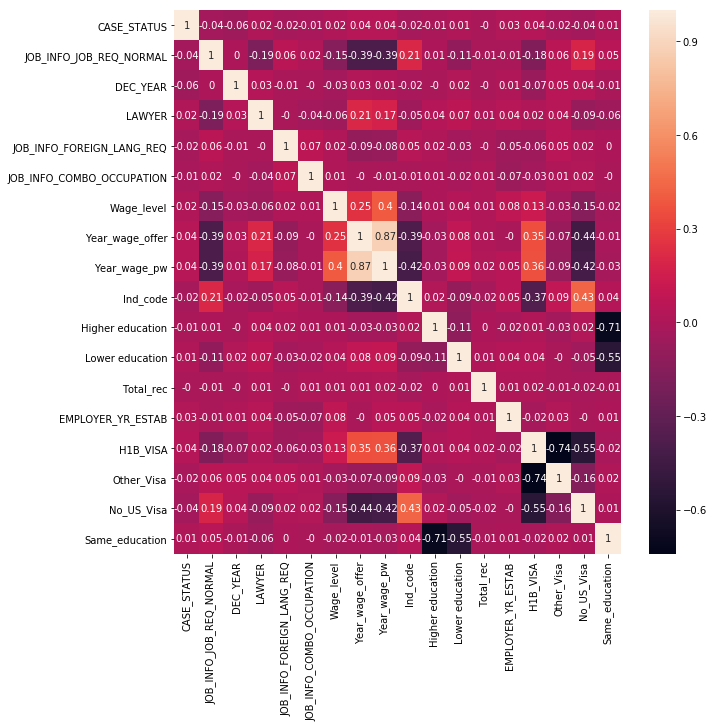

In [26]:
#Getting correlation between all of the variables
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data_fin.corr(), annot = round(data_fin.corr(), ndigits=2))
plt.show()

In [408]:
data_fin.columns

Index(['CASE_STATUS', 'JOB_INFO_JOB_REQ_NORMAL', 'DEC_YEAR', 'LAWYER',
       'JOB_INFO_FOREIGN_LANG_REQ', 'JOB_INFO_COMBO_OCCUPATION', 'Wage_level',
       'Year_wage_offer', 'Year_wage_pw', 'Ind_code', 'Higher education',
       'Lower education', 'Total_rec', 'EMPLOYER_YR_ESTAB', 'H1B_VISA',
       'Other_Visa', 'No_US_Visa', 'Same_education'],
      dtype='object')

In [411]:
data_fin['Offer_lower_pw'] = np.where(data_fin['Year_wage_offer'] < data_fin['Year_wage_pw'], 1, 0)

In [412]:
data_finn = data_fin.copy()

In [413]:
data_finn = data_finn.drop(['Total_rec','DEC_YEAR','Wage_level','Year_wage_offer','Year_wage_pw','Ind_code','EMPLOYER_YR_ESTAB'], axis=1)

In [415]:
#splitting features from target
status = data_finn['CASE_STATUS'].as_matrix()
data_ftr = data_finn.iloc[:,1:]

## Importing final excel

In [27]:
input = pd.read_excel("finalSheet.xlsx")

In [151]:
input.columns

Index(['CASE_STATUS', 'FOREIGN_WORKER_INFO_EDUCATION',
       'JOB_INFO_JOB_REQ_NORMAL', 'CitizenRegion', 'postalValue', 'DEC_YEAR',
       'LAWYER', 'JOB_INFO_FOREIGN_LANG_REQ', 'JOB_INFO_COMBO_OCCUPATION',
       'Wage_level', 'Year_wage_offer', 'Year_wage_pw', 'Ind_code',
       'Higher education', 'Lower education', 'Total_rec', 'EMPLOYER_YR_ESTAB',
       'H1B_VISA', 'Other_Visa', 'No_US_Visa', 'Same_education'],
      dtype='object')

In [276]:
df = input.copy()

In [277]:
norm_wage = pd.DataFrame(df.groupby(['Ind_code','Wage_level'])['Year_wage_pw'].median())
norm_wage_off = pd.DataFrame(df.groupby(['Ind_code','Wage_level'])['Year_wage_offer'].median())
norm_wage.columns= ["Median_pw"]
norm_wage_off.columns= ["Median_offer"]

#Getting rid of the outliers for the wages
df['PW_outlier'] = is_outlier(df['Year_wage_pw'])
df['Offer_outlier'] = is_outlier(df['Year_wage_offer'])

df.Year_wage_pw.loc[df['PW_outlier'] == True] = (df.loc[df['PW_outlier'] == True].merge(norm_wage, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True))['Median_pw']
df.Year_wage_offer.loc[df['Offer_outlier'] == True] = (df.loc[df['Offer_outlier'] == True].merge(norm_wage_off, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True))['Median_offer']

In [278]:
df['EducationNA'] = np.where(df['FOREIGN_WORKER_INFO_EDUCATION']==0, 1, 0)
df['Education1'] = np.where(df['FOREIGN_WORKER_INFO_EDUCATION']==1, 1, 0)
df['Education2'] = np.where(df['FOREIGN_WORKER_INFO_EDUCATION']==2, 1, 0)
df['Education3'] = np.where(df['FOREIGN_WORKER_INFO_EDUCATION']==3, 1, 0)
df['Education4'] = np.where(df['FOREIGN_WORKER_INFO_EDUCATION']==4, 1, 0)
df['Education5'] = np.where(df['FOREIGN_WORKER_INFO_EDUCATION']==5, 1, 0)
df['Education6'] = np.where(df['FOREIGN_WORKER_INFO_EDUCATION']==6, 1, 0)
df['CitizenRegion1'] = np.where(df['CitizenRegion']==1, 1, 0)
df['CitizenRegion2'] = np.where(df['CitizenRegion']==2, 1, 0)
df['CitizenRegion3'] = np.where(df['CitizenRegion']==3, 1, 0)
df['CitizenRegion4'] = np.where(df['CitizenRegion']==4, 1, 0)
df['CitizenRegion5'] = np.where(df['CitizenRegion']==5, 1, 0)
df['CitizenRegion6'] = np.where(df['CitizenRegion']==6, 1, 0)
df['CitizenRegion7'] = np.where(df['CitizenRegion']==7, 1, 0)
df['CitizenRegion8'] = np.where(df['CitizenRegion']==8, 1, 0)
df['CitizenRegion9'] = np.where(df['CitizenRegion']==9, 1, 0)
df['CitizenRegion10'] = np.where(df['CitizenRegion']==10, 1, 0)
df['CitizenRegion11'] = np.where(df['CitizenRegion']==11, 1, 0)
df['CitizenRegion12'] = np.where(df['CitizenRegion']==12, 1, 0)
df['CitizenRegion13'] = np.where(df['CitizenRegion']==13, 1, 0)
df['CitizenRegion14'] = np.where(df['CitizenRegion']==14, 1, 0)
df['CitizenRegion15'] = np.where(df['CitizenRegion']==15, 1, 0)
df['CitizenRegion16'] = np.where(df['CitizenRegion']==16, 1, 0)
df['CitizenRegion17'] = np.where(df['CitizenRegion']==17, 1, 0)
df['CitizenRegion18'] = np.where(df['CitizenRegion']==18, 1, 0)
df['CitizenRegion19'] = np.where(df['CitizenRegion']==19, 1, 0)
df['CitizenRegion20'] = np.where(df['CitizenRegion']==20, 1, 0)
df['CitizenRegion21'] = np.where(df['CitizenRegion']==21, 1, 0)
df['CitizenRegion22'] = np.where(df['CitizenRegion']==22, 1, 0)
df['CitizenRegion23'] = np.where(df['CitizenRegion']==23, 1, 0)
df['postalValue0'] = np.where(df['postalValue']==0, 1, 0)
df['postalValue1'] = np.where(df['postalValue']==1, 1, 0)
df['postalValue2'] = np.where(df['postalValue']==2, 1, 0)
df['postalValue3'] = np.where(df['postalValue']==3, 1, 0)
df['postalValue4'] = np.where(df['postalValue']==4, 1, 0)
df['postalValue5'] = np.where(df['postalValue']==5, 1, 0)
df['postalValue6'] = np.where(df['postalValue']==6, 1, 0)
df['postalValue7'] = np.where(df['postalValue']==7, 1, 0)
df['postalValue8'] = np.where(df['postalValue']==8, 1, 0)
df['postalValue9'] = np.where(df['postalValue']==9, 1, 0)
df['Ind_Code11'] = np.where(df['Ind_code']==11, 1, 0)
df['Ind_Code13'] = np.where(df['Ind_code']==13, 1, 0)
df['Ind_Code15'] = np.where(df['Ind_code']==15, 1, 0)
df['Ind_Code17'] = np.where(df['Ind_code']==17, 1, 0)
df['Ind_Code19'] = np.where(df['Ind_code']==19, 1, 0)
df['Ind_Code20'] = np.where(df['Ind_code']==20, 1, 0)
df['Ind_Code21'] = np.where(df['Ind_code']==21, 1, 0)
df['Ind_Code23'] = np.where(df['Ind_code']==23, 1, 0)
df['Ind_Code25'] = np.where(df['Ind_code']==25, 1, 0)
df['Ind_Code27'] = np.where(df['Ind_code']==27, 1, 0)
df['Ind_Code29'] = np.where(df['Ind_code']==29, 1, 0)
df['Ind_Code30'] = np.where(df['Ind_code']==30, 1, 0)
df['Ind_Code31'] = np.where(df['Ind_code']==31, 1, 0)
df['Ind_Code33'] = np.where(df['Ind_code']==33, 1, 0)
df['Ind_Code35'] = np.where(df['Ind_code']==35, 1, 0)
df['Ind_Code37'] = np.where(df['Ind_code']==37, 1, 0)
df['Ind_Code39'] = np.where(df['Ind_code']==39, 1, 0)
df['Ind_Code41'] = np.where(df['Ind_code']==41, 1, 0)
df['Ind_Code43'] = np.where(df['Ind_code']==43, 1, 0)
df['Ind_Code45'] = np.where(df['Ind_code']==45, 1, 0)
df['Ind_Code47'] = np.where(df['Ind_code']==47, 1, 0)
df['Ind_Code49'] = np.where(df['Ind_code']==49, 1, 0)
df['Ind_Code51'] = np.where(df['Ind_code']==51, 1, 0)
df['Ind_Code53'] = np.where(df['Ind_code']==53, 1, 0)
df['Ind_Code90'] = np.where(df['Ind_code']==90, 1, 0)
df['Ind_Code91'] = np.where(df['Ind_code']==91, 1, 0)
df['upperWage'] = np.where(df['Year_wage_offer']>=150000, 1, 0)
df['upperMiddleWage'] = np.where((df['Year_wage_offer']>=100000) & (df['Year_wage_offer']<=150000), 1, 0)
df['middleWage'] = np.where((df['Year_wage_offer']>=30000) & (df['Year_wage_offer']<=99999), 1, 0)
df['povertyWage'] = np.where(df['Year_wage_offer']<=30000, 1, 0)

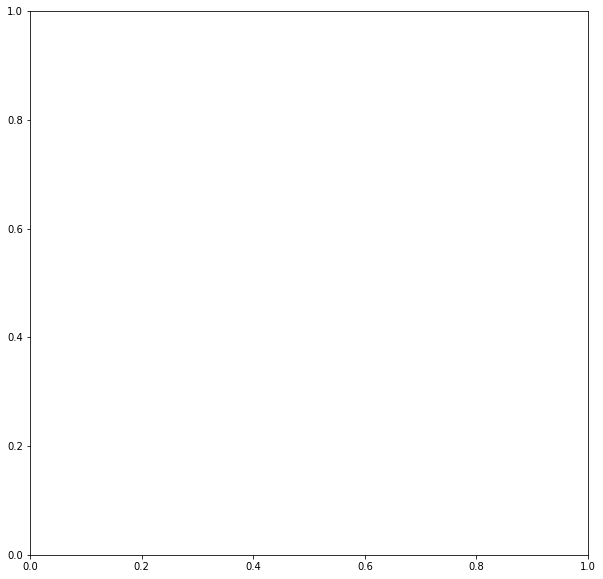

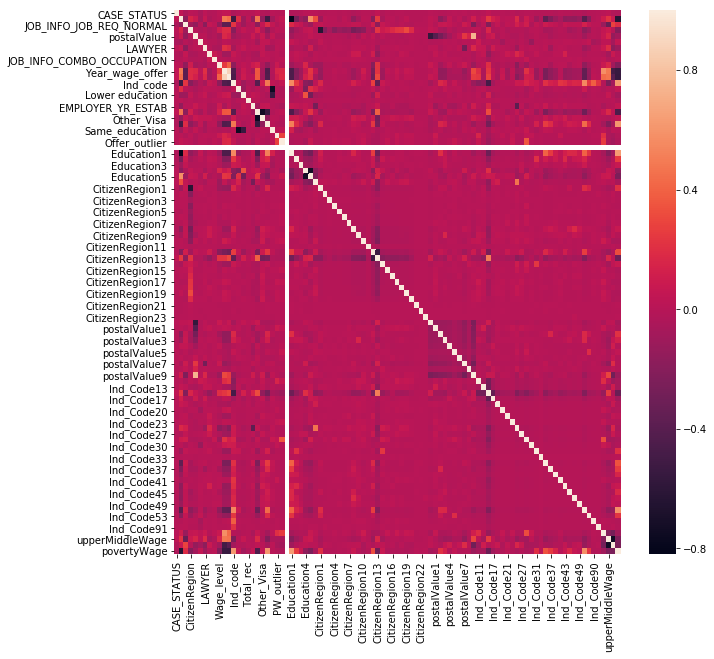

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr())#, annot = round(df.corr(), ndigits=2))
plt.show()

In [279]:
df = df.drop([ 'Lower education','Other_Visa','PW_outlier','Offer_outlier','CitizenRegion','postalValue','FOREIGN_WORKER_INFO_EDUCATION','DEC_YEAR','Wage_level','Year_wage_offer','Year_wage_pw','Ind_code', 'Same_education'], axis=1)

In [280]:
df = df.drop(['EMPLOYER_YR_ESTAB'], axis=1)

In [281]:
df = df.drop(['Total_rec'], axis=1)

In [377]:
#splitting features from target
status_bin = df['CASE_STATUS'].as_matrix()
data_ftr_bin = df.iloc[:,1:]

## Trying mutual information

In [284]:
mutual_info_classif(data_ftr_bin, status_bin)

KeyboardInterrupt: 

## Functions for different classifications

In [62]:
def logit_regr(target, features):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
    clf = LogisticRegression()
    clfModel = clf.fit(X_train, y_train)
    # predict target with feature test set using trained model
    target_pred = clfModel.predict(X_test)
    print(pandas.DataFrame(metrics.confusion_matrix(y_test, target_pred), columns=["Denied","Certified"], index=["Denied","Certified"]))
    coef = clf.coef_[0]
    #print (coef)
    print("The accuracy score for this training is",metrics.accuracy_score(y_test, target_pred))
    print(classification_report(y_test, target_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
    print(metrics.auc(fpr, tpr))

In [63]:
def gaussian_nb(target, features):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
    gnb = GaussianNB()
    gnbModel = gnb.fit(X_train, y_train)
    # predict target with feature test set using trained model
    target_pred = gnbModel.predict(X_test)
    print(pandas.DataFrame(metrics.confusion_matrix(y_test, target_pred)))
    #coef = gnb.coef_[0]
    #print (coef)
    print("The accuracy score for this training is",metrics.accuracy_score(y_test, target_pred))
    print(classification_report(y_test, target_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, gnb.predict_proba(X_test)[:,1], pos_label=1)
    print(metrics.auc(fpr, tpr))

In [340]:
def svc(target, features):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
    svc = SVC(probability=True)
    gnbModel = svc.fit(X_train, y_train)
    # predict target with feature test set using trained model
    target_pred = gnbModel.predict(X_test)
    print(pandas.DataFrame(metrics.confusion_matrix(y_test, target_pred)))
    #coef = gnb.coef_[0]
    #print (coef)
    print("The accuracy score for this training is",metrics.accuracy_score(y_test, target_pred))
    print(classification_report(y_test, target_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svc.predict_proba(X_test)[:,1], pos_label=1)
    print(metrics.auc(fpr, tpr))

In [146]:
def cart(target,features):
    from sklearn import tree
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(pandas.DataFrame(metrics.confusion_matrix(y_test, pred)))
    coef = clf.feature_importances_
    prob = clf.predict_proba(X_test)
    print("The accuracy score for this training is",metrics.accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prob[:,1], pos_label=1)
    print(metrics.auc(fpr, tpr))
    print(clf.n_features_)
    return(coef)

In [403]:
def k_folds(target, features, method, folds):
    from sklearn.model_selection import StratifiedKFold
    from sklearn import tree
# initialize
    cms = {}
    accuracy_scores   = []
    auc_scores = []
    cv = StratifiedKFold(n_splits = 10)
    for train, test in cv.split(features,target):
        # train then immediately predict the test set
        if method == "cart":
            model = tree.DecisionTreeClassifier()
        elif method == "logit":
            model = LogisticRegression()
        elif method == "svc":
            model =  SVC(probability=True)
        elif method == "nb":
            model = GaussianNB()
        model = model.fit(features.iloc[train],target[train])
        target_pred = model.predict(features.iloc[test])
        # compute the confusion matrix on each fold, convert it to a DataFrame and stash it for later compute
        #cms[i] = pandas.DataFrame(metrics.confusion_matrix(target[test], target_pred), columns=labels, index=labels)
        # stash the overall accuracy on the test set for the fold too
        accuracy_scores.append(metrics.accuracy_score(target[test], target_pred))
        fpr, tpr, thresholds = metrics.roc_curve(target[test], model.predict_proba(features.iloc[test])[:,1], pos_label=1)
        auc_scores.append(metrics.auc(fpr, tpr))

    # Panel of all test set confusion matrices
    #pl = pandas.Panel(cms)
    #cm = pl.sum(axis=0) #Sum the confusion matrices to get one view of how well the classifiers perform
    print("Average accuracy: ", np.mean(accuracy_scores))
    print("Average auc score: ", np.mean(auc_scores))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % np.mean(auc_scores))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Raw classifications

In [285]:
logit_regr(status_bin, data_ftr_bin)

           Denied  Certified
Denied         43       5833
Certified      10      83493
The accuracy score for this training is 0.934626702022
             precision    recall  f1-score   support

          0       0.81      0.01      0.01      5876
          1       0.93      1.00      0.97     83503

avg / total       0.93      0.93      0.90     89379

0.579819235144


Average accuracy:  0.935048049401
Average auc score:  0.569073700388


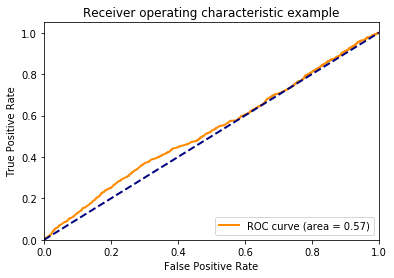

In [404]:
k_folds(status_bin, data_ftr_bin, "logit", 10)

Average accuracy:  0.934608361981
Average auc score:  0.560926013993


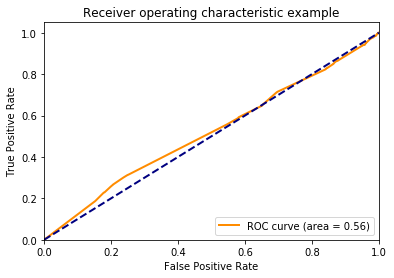

In [416]:
k_folds(status, data_ftr, "logit", 10)

In [286]:
gaussian_nb(status_bin, data_ftr_bin)

       0      1
0   1319   4607
1  12360  71093
The accuracy score for this training is 0.81016793654
             precision    recall  f1-score   support

          0       0.10      0.22      0.13      5926
          1       0.94      0.85      0.89     83453

avg / total       0.88      0.81      0.84     89379

0.557447781058


In [379]:
k_folds(status_bin, data_ftr_bin, "nb", 10)

Average accuracy:  0.855676420867
Average auc score:  0.553009854618


Average accuracy:  0.909575420411
Average auc score:  0.55598316165


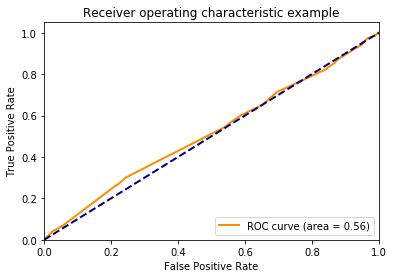

In [417]:
k_folds(status, data_ftr, "nb", 10)

In [287]:
coef = cart(status_bin, data_ftr_bin)

      0      1
0   255   5647
1  1359  82118
The accuracy score for this training is 0.921614696965
             precision    recall  f1-score   support

          0       0.16      0.04      0.07      5902
          1       0.94      0.98      0.96     83477

avg / total       0.88      0.92      0.90     89379

0.543278394148
77


Average accuracy:  0.921376915966
Average auc score:  0.525900440798


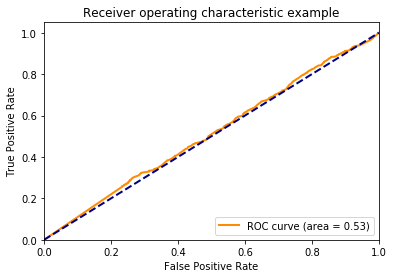

In [406]:
k_folds(status_bin, data_ftr_bin, "cart", 10)

Average accuracy:  0.934413679633
Average auc score:  0.554866349695


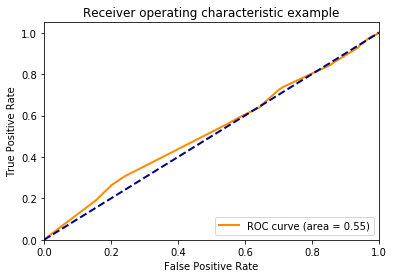

In [418]:
k_folds(status, data_ftr, "cart", 10)

## Getting rid of + rows

In [385]:
row_test = df.copy()

In [388]:
row_test_cut = row_test.drop(row_test.query('CASE_STATUS == 1').sample(frac=.75).index)

In [420]:
#another row cut but with different features
row_testt = data_finn.drop(data_finn.query('CASE_STATUS == 1').sample(frac=.75).index)
status_cut_2 = row_test_cut['CASE_STATUS'].as_matrix()
data_ftr_cut_2 = row_test_cut.iloc[:,1:]

In [386]:
row_test['CASE_STATUS'].value_counts() / row_test['CASE_STATUS'].value_counts().sum()

1    0.934608
0    0.065392
Name: CASE_STATUS, dtype: float64

In [389]:
row_test_cut['CASE_STATUS'].value_counts() / row_test_cut['CASE_STATUS'].value_counts().sum()

0    0.631855
1    0.368145
Name: CASE_STATUS, dtype: float64

In [390]:
status_cut = row_test_cut['CASE_STATUS'].as_matrix()
data_ftr_cut = row_test_cut.iloc[:,1:]

In [391]:
logit_regr(status_cut, data_ftr_cut)

           Denied  Certified
Denied       5706        111
Certified    3345         88
The accuracy score for this training is 0.626378378378
             precision    recall  f1-score   support

          0       0.63      0.98      0.77      5817
          1       0.44      0.03      0.05      3433

avg / total       0.56      0.63      0.50      9250

0.586737668017


Average accuracy:  0.625206008868
Average auc score:  0.574918582248


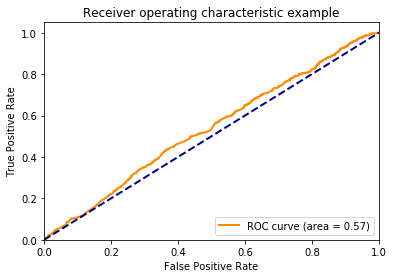

In [405]:
k_folds(status_cut, data_ftr_cut, "logit", 10)

Average accuracy:  0.625206008868
Average auc score:  0.57492410085


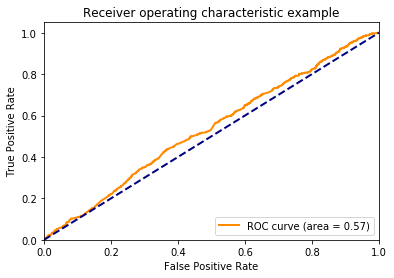

In [421]:
k_folds(status_cut_2, data_ftr_cut_2, "logit", 10)

In [394]:
gaussian_nb(status_cut, data_ftr_cut)

     0     1
0  458  5392
1  175  3225
The accuracy score for this training is 0.398162162162
             precision    recall  f1-score   support

          0       0.72      0.08      0.14      5850
          1       0.37      0.95      0.54      3400

avg / total       0.60      0.40      0.29      9250

0.552501382604


In [395]:
k_folds(status_cut, data_ftr_cut, "nb", 10)

Average accuracy:  0.409103454106
Average auc score:  0.560591642771


Average accuracy:  0.409103454106
Average auc score:  0.560591642771


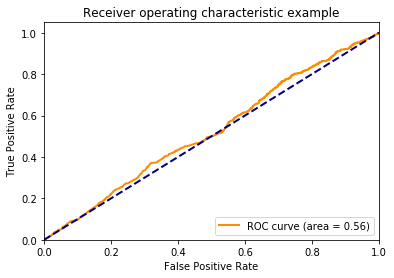

In [423]:
k_folds(status_cut_2, data_ftr_cut_2, "nb", 10)

In [397]:
coef = cart(status_cut, data_ftr_cut)

      0     1
0  4608  1226
1  2556   860
The accuracy score for this training is 0.591135135135
             precision    recall  f1-score   support

          0       0.64      0.79      0.71      5834
          1       0.41      0.25      0.31      3416

avg / total       0.56      0.59      0.56      9250

0.558784449392
77


Average accuracy:  0.586154768041
Average auc score:  0.546931130804


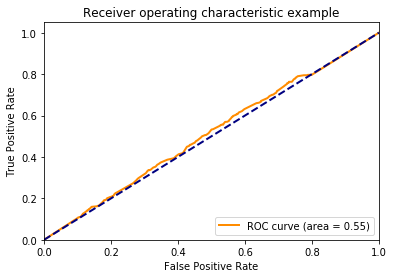

In [407]:
k_folds(status_cut, data_ftr_cut, "cart", 10)

Average accuracy:  0.585408836115
Average auc score:  0.545358973564


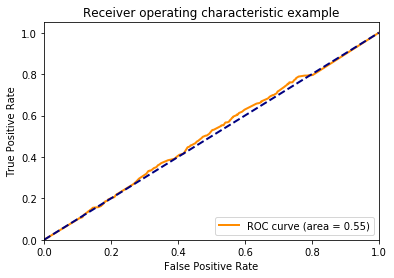

In [424]:
k_folds(status_cut_2, data_ftr_cut_2, "cart", 10)

In [339]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(data_ftr_cut, status_cut, test_size=0.3)
svc = SVC(probability=True)
gnbModel = svc.fit(X_train, y_train)
svc.predict_proba(X_test)[:,1]
    # predict target with feature test set using trained model
    #target_pred = gnbModel.predict(X_test)
    #print(pandas.DataFrame(metrics.confusion_matrix(y_test, target_pred)))
    #coef = gnb.coef_[0]
    #print (coef)
    #print("The accuracy score for this training is",metrics.accuracy_score(y_test, target_pred))
    #print(classification_report(y_test, target_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, svc.predict_proba(X_test)[:,1], pos_label=2)
print(metrics.auc(fpr, tpr))

array([ 0.50913576,  0.55598508,  0.54717912, ...,  0.38902731,
        0.56180334,  0.41171617])

## Clustering on uncut data and running classification

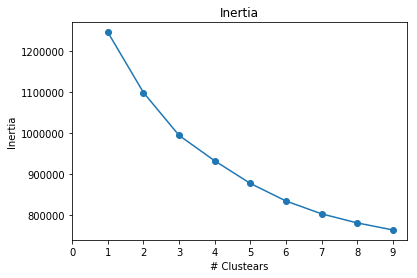

In [298]:
# <help:scikit_k_means_cluster>
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
from time import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.cluster import KMeans

# set the number of clusters, must be >=1
n = 10
inertia = [np.NaN]

# perform k-means clustering over i=0...k
for k in range(1,n):
    k_means_ = KMeans(n_clusters=k)
    k_means_.fit(data_ftr_bin)
    #labels = kmeans.labels_
    #print('k = %d, inertia= %f' % (k, k_means_.inertia_ ))
    inertia.append(k_means_.inertia_) 
    
# plot the SSE of the clusters for each value of i
ax = plt.subplot(111)
ax.plot(inertia, '-o')
plt.xticks(range(n))
plt.title("Inertia")
ax.set_ylabel('Inertia')
ax.set_xlabel('# Clustears')
plt.show() 

In [299]:
# <help:scikit_k_means_cluster>
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
from time import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.cluster import KMeans

# set the number of clusters, must be >=1
n = 8
inertia = [np.NaN]

# perform k-means clustering over i=0...k

k_means_ = KMeans(n_clusters=8)
k_means_.fit(data_ftr_bin)
labels = k_means_.labels_
#print('k = %d, inertia= %f' % (k, k_means_.inertia_ ))
inertia.append(k_means_.inertia_) 
    

In [300]:
data_ftr_bin['Cluster_Label'] = labels

In [301]:
data_ftr_bin['Cluster_Label'].value_counts()

1    50278
3    48352
6    47328
2    43262
5    35995
0    26089
4    24444
7    22180
Name: Cluster_Label, dtype: int64

In [302]:
data_ftr_bin['CASE_STATUS'] =  status_bin

Running classification on the clusters, with 75% of the + data taken out

In [305]:
sub_df = {}
for k in range(0,8):
    sub_df[k] = data_ftr_bin.loc[data_ftr_bin['Cluster_Label'] ==k]

In [307]:
sub_df_cut = {}
for key, value in sub_df.items():
    sub_df_cut[key] = value.drop(value.query('CASE_STATUS == 1').sample(frac=.75).index)

In [308]:
for key, value in sub_df_cut.items():
    logit_regr(value.iloc[:,-1], value.iloc[:,0:77])

           Denied  Certified
Denied          4        445
Certified       2       1638
The accuracy score for this training is 0.786022020105
             precision    recall  f1-score   support

          0       0.67      0.01      0.02       449
          1       0.79      1.00      0.88      1640

avg / total       0.76      0.79      0.69      2089

0.552552420012
           Denied  Certified
Denied          0        853
Certified       3       2822
The accuracy score for this training is 0.767264817836
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       853
          1       0.77      1.00      0.87      2825

avg / total       0.59      0.77      0.67      3678

0.536117191796
           Denied  Certified
Denied          0        681
Certified       0       2517
The accuracy score for this training is 0.787054409006
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       681
       

In [309]:
for key, value in sub_df_cut.items():
    gaussian_nb(value.iloc[:,-1], value.iloc[:,0:77])

     0     1
0   47   365
1  119  1558
The accuracy score for this training is 0.768310196266
             precision    recall  f1-score   support

          0       0.28      0.11      0.16       412
          1       0.81      0.93      0.87      1677

avg / total       0.71      0.77      0.73      2089

0.529597321847
     0     1
0   72   770
1  195  2641
The accuracy score for this training is 0.737629146275
             precision    recall  f1-score   support

          0       0.27      0.09      0.13       842
          1       0.77      0.93      0.85      2836

avg / total       0.66      0.74      0.68      3678

0.531324646804
      0    1
0   660   50
1  2330  158
The accuracy score for this training is 0.255784865541
             precision    recall  f1-score   support

          0       0.22      0.93      0.36       710
          1       0.76      0.06      0.12      2488

avg / total       0.64      0.26      0.17      3198

0.513698994611
     0     1
0   93   749
1 

In [310]:
for key, value in sub_df_cut.items():
    cart(value.iloc[:,-1], value.iloc[:,0:77])

     0     1
0   81   373
1  233  1402
The accuracy score for this training is 0.709909047391
             precision    recall  f1-score   support

          0       0.26      0.18      0.21       454
          1       0.79      0.86      0.82      1635

avg / total       0.67      0.71      0.69      2089

0.532708914306
77
     0     1
0   54   793
1  168  2663
The accuracy score for this training is 0.738716693855
             precision    recall  f1-score   support

          0       0.24      0.06      0.10       847
          1       0.77      0.94      0.85      2831

avg / total       0.65      0.74      0.68      3678

0.525913346793
77
    0     1
0  28   668
1  68  2434
The accuracy score for this training is 0.7698561601
             precision    recall  f1-score   support

          0       0.29      0.04      0.07       696
          1       0.78      0.97      0.87      2502

avg / total       0.68      0.77      0.70      3198

0.548883594274
77
     0     1
0   75   79

In [342]:
for key, value in sub_df_cut.items():
    svc(value.iloc[:,-1], value.iloc[:,0:77])

   0     1
0  0   432
1  0  1657
The accuracy score for this training is 0.793202489229
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       432
          1       0.79      1.00      0.88      1657

avg / total       0.63      0.79      0.70      2089

0.529936129551
   0     1
0  0   854
1  0  2824
The accuracy score for this training is 0.767808591626
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       854
          1       0.77      1.00      0.87      2824

avg / total       0.59      0.77      0.67      3678

0.518540272074
   0     1
0  0   707
1  0  2491
The accuracy score for this training is 0.778924327705
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       707
          1       0.78      1.00      0.88      2491

avg / total       0.61      0.78      0.68      3198

0.48581711701
   0     1
0  0   849
1  0  2750
The accuracy s

## Clustering on cut data and running classification

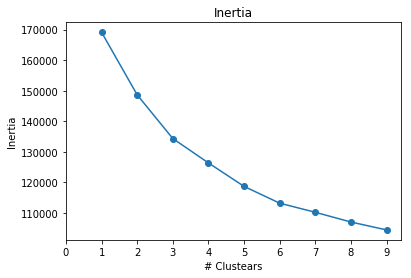

In [255]:
# <help:scikit_k_means_cluster>
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
from time import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.cluster import KMeans

# set the number of clusters, must be >=1
n = 10
inertia = [np.NaN]

# perform k-means clustering over i=0...k
for k in range(1,n):
    k_means_ = KMeans(n_clusters=k)
    k_means_.fit(data_ftr_cut)
    #labels = kmeans.labels_
    #print('k = %d, inertia= %f' % (k, k_means_.inertia_ ))
    inertia.append(k_means_.inertia_) 
    
# plot the SSE of the clusters for each value of i
ax = plt.subplot(111)
ax.plot(inertia, '-o')
plt.xticks(range(n))
plt.title("Inertia")
ax.set_ylabel('Inertia')
ax.set_xlabel('# Clustears')
plt.show() 

In [311]:
# <help:scikit_k_means_cluster>
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
from time import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.cluster import KMeans

# set the number of clusters, must be >=1
n = 8
inertia = [np.NaN]

# perform k-means clustering over i=0...k

k_means_ = KMeans(n_clusters=8)
k_means_.fit(data_ftr_cut)
labels = k_means_.labels_
#print('k = %d, inertia= %f' % (k, k_means_.inertia_ ))
inertia.append(k_means_.inertia_) 
    

In [312]:
data_ftr_cut['Cluster_Label'] = labels

In [313]:
data_ftr_cut['Cluster_Label'].value_counts()

2    7742
4    5720
0    5226
6    4886
1    4629
7    4381
5    3637
3    3153
Name: Cluster_Label, dtype: int64

In [314]:
data_ftr_cut['CASE_STATUS'] =  status_cut

Running classification on the clusters, with 75% of the + data taken out

In [315]:
sub_df_precut = {}
for k in range(0,8):
    sub_df_precut[k] = data_ftr_cut.loc[data_ftr_cut['Cluster_Label'] ==k]

In [316]:
sub_df_cut_precut = {}
for key, value in sub_df.items():
    sub_df_cut_precut[key] = value.drop(value.query('CASE_STATUS == 1').sample(frac=.75).index)

In [320]:
for key, value in sub_df_cut_precut.items():
    logit_regr(value.iloc[:,-1], value.iloc[:,0:77])

           Denied  Certified
Denied          2        455
Certified       2       1638
The accuracy score for this training is 0.782069623271
             precision    recall  f1-score   support

          0       0.50      0.00      0.01       457
          1       0.78      1.00      0.88      1640

avg / total       0.72      0.78      0.69      2097

0.560103671879
           Denied  Certified
Denied          1        871
Certified       2       2804
The accuracy score for this training is 0.76264274062
             precision    recall  f1-score   support

          0       0.33      0.00      0.00       872
          1       0.76      1.00      0.87      2806

avg / total       0.66      0.76      0.66      3678

0.53194273248
           Denied  Certified
Denied          0        695
Certified       0       2529
The accuracy score for this training is 0.784429280397
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       695
         

In [321]:
for key, value in sub_df_cut_precut.items():
    gaussian_nb(value.iloc[:,-1], value.iloc[:,0:77])

      0   1
0   430  16
1  1585  66
The accuracy score for this training is 0.236528373867
             precision    recall  f1-score   support

          0       0.21      0.96      0.35       446
          1       0.80      0.04      0.08      1651

avg / total       0.68      0.24      0.13      2097

0.51913366814
    0     1
0  29   830
1  71  2748
The accuracy score for this training is 0.755029907558
             precision    recall  f1-score   support

          0       0.29      0.03      0.06       859
          1       0.77      0.97      0.86      2819

avg / total       0.66      0.76      0.67      3678

0.518782822862
      0    1
0   643   43
1  2368  170
The accuracy score for this training is 0.252171215881
             precision    recall  f1-score   support

          0       0.21      0.94      0.35       686
          1       0.80      0.07      0.12      2538

avg / total       0.67      0.25      0.17      3224

0.54348480358
     0     1
0   78   808
1  195  25

In [322]:
for key, value in sub_df_cut_precut.items():
    cart(value.iloc[:,-1], value.iloc[:,0:77])

     0     1
0   78   403
1  230  1386
The accuracy score for this training is 0.698140200286
             precision    recall  f1-score   support

          0       0.25      0.16      0.20       481
          1       0.77      0.86      0.81      1616

avg / total       0.66      0.70      0.67      2097

0.517456027048
77
     0     1
0   55   778
1  127  2718
The accuracy score for this training is 0.753942359978
             precision    recall  f1-score   support

          0       0.30      0.07      0.11       833
          1       0.78      0.96      0.86      2845

avg / total       0.67      0.75      0.69      3678

0.521856756762
77
    0     1
0  36   690
1  63  2435
The accuracy score for this training is 0.766439205955
             precision    recall  f1-score   support

          0       0.36      0.05      0.09       726
          1       0.78      0.97      0.87      2498

avg / total       0.69      0.77      0.69      3224

0.565628811589
77
     0     1
0   71   